# ICA

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean
    return centered, mean

def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    n = np.shape(x)[1] - 1
    m = x - mean

    return (m.dot(m.T))/n

def whiten(x):
    # Calculate the covariance matrix
    coVarM = covariance(X)

    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)

    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))

    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))

    # Project onto whitening matrix
    Xw = np.dot(whiteM, X)

    return Xw, whiteM

def fastIca(signals,  alpha = 1, thresh=1e-8, iterations=5000):
    m, n = signals.shape

    # Initialize random weights
    W = np.random.rand(m, m)

    for c in range(m):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())

            i = 0
            lim = 100
            while ((lim > thresh) & (i < iterations)):

                # Dot product of weight and signal
                ws = np.dot(w.T, signals)

                # Pass w*s into contrast function g
                wg = np.tanh(ws * alpha).T

                # Pass w*s into g prime
                wg_ = (1 - np.square(np.tanh(ws))) * alpha

                # Update weights
                wNew = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()

                # Decorrelate weights              
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt((wNew ** 2).sum())

                # Calculate limit condition
                lim = np.abs(np.abs((wNew * w).sum()) - 1)

                # Update weights
                w = wNew

                # Update counter
                i += 1

            W[c, :] = w.T
    return W

# Pre-Processing

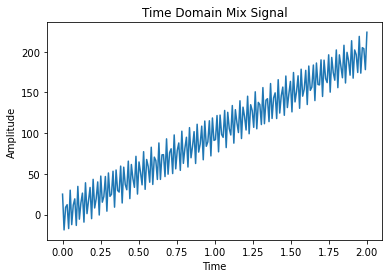

In [3]:
from scipy import pi

sample_rate = 100  # defines the number of samples taken per second(here 1024 sample taken in one sec)
N = (2 - 0) * sample_rate # size of the array. (end time _ start time)* sample rate(here only 2 sec of data available)

time = np.linspace(0, 2, N) # creates timestamps numbered total collected data with evenly spaced

freq1 = 60
magnitude1 = 25
freq2 = 27
magnitude2 = 2
waveform2= magnitude2 * np.sin (2 * pi * freq2 * time)
waveform1 = magnitude1 * np.cos (2 * pi * freq1 * time)
b = [i for i in range(200)]
waveform1 += b
plt.plot (time [0:], waveform1 [0:])
plt.title ('Time Domain Mix Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

In [28]:
# Set a seed for the random number generator for reproducibility
np.random.seed(23)

# Number of samples
ns = np.linspace(0, 200, 200)
# Source matrix
c = np.random.random(len(ns))

X = (np.c_[c,b+c,waveform1+c]).T

In [29]:
# Center signals
Xc, meanX = center(X)

# Whiten mixed signals
Xw, whiteM = whiten(Xc)

# Check if covariance of whitened matrix equals identity matrix
print(np.round(covariance(Xw)))

[[ 1. -0.  0.]
 [-0.  1. -0.]
 [ 0. -0.  1.]]


# Running ICA

In [30]:
W = fastIca(Xw,  alpha=1)

#Un-mix signals using
unMixed = Xw.T.dot(W.T)

# Subtract mean
unMixed = (unMixed.T - meanX).T

# Plot Signals

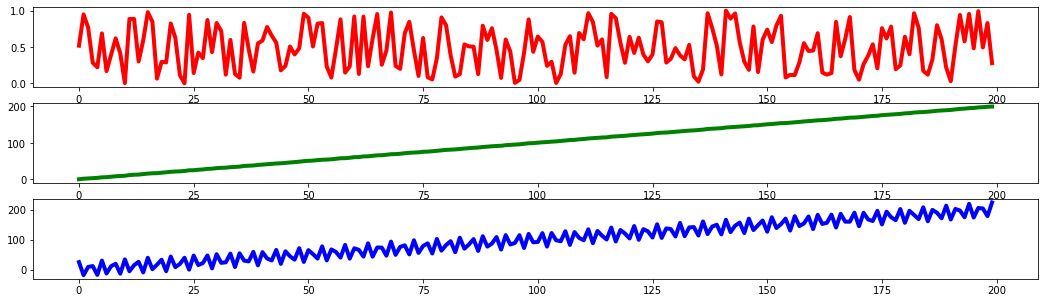

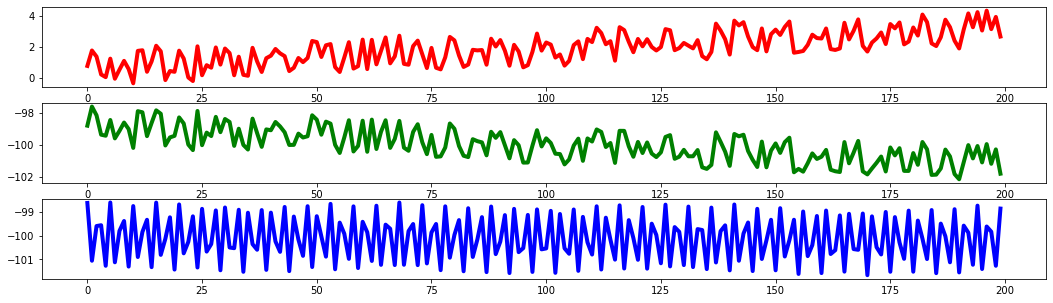

In [31]:

colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(3, 1, figsize=[18, 5])
for i in range(3):
    ax[i].plot(X[i], lw = 4, color = colors[i])

# ax.set_xlim(0, 10)

fig, ax = plt.subplots(3, 1, figsize=[18, 5],)
for i in range(3):
    ax[i].plot(unMixed.T[i], lw = 4, color = colors[i])
